In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Sample data: Years of Experience vs Salary
data = {
    'YearsExperience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [40000, 42000, 50000, 52000, 60000, 62000, 70000, 72000, 80000, 82000]
}


In [3]:
# Create a DataFrame
df = pd.DataFrame(data)
df

,YearsExperience,Salary
0,1,40000
1,2,42000
2,3,50000
3,4,52000
4,5,60000
5,6,62000
6,7,70000
7,8,72000
8,9,80000
9,10,82000


In [4]:
# Independent variable (X) and dependent variable (y)
X = df[['YearsExperience']]
y = df['Salary']


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Create a linear regression model
model = LinearRegression()


In [7]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [14]:
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

Training set score: 0.99
Test set score: 0.98


In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([77413.79310345, 44586.20689655])

In [9]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 6688466.111771647
R-squared: 0.9814723930421838


In [11]:
# Display the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


Intercept: 35206.89655172413
Coefficient: 4689.655172413794


In [12]:
# Prediction for a new value
years_experience = 5
predicted_salary = model.predict([[years_experience]])
print(f"Predicted Salary for {years_experience} years of experience: ${predicted_salary[0]:,.2f}")


Predicted Salary for 5 years of experience: $58,655.17


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Ridge Regression

In [13]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.99
Test set score: 0.98


This is consistent with our expectation. With linear
regression, we were overfitting our data. Ridge is a more restricted model, so we are
less likely to overfit. A less complex model means worse performance on the training
set, but better generalization. As we are only interested in generalization perfor‐
mance, we should choose the Ridge model over the LinearRegression model.
The Ridge model makes a trade-off between the simplicity of the model (near-zero
coefficients) and its performance on the training set. How much importance the
model places on simplicity versus training set performance can be specified by the
user, using the alpha parameter. In the previous example, we used the default param‐
eter alpha=1.0. There is no reason why this will give us the best trade-off, though.
The optimum setting of alpha depends on the particular dataset we are using.
Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization. For example:


In [15]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))


Training set score: 0.97
Test set score: 0.93


Decreasing alpha allows the coefficients to be less restricted, meaning we move right
in Figure. For very small values of alpha, coefficients are barely restricted at all,
and we end up with a model that resembles LinearRegression

In [17]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))


Training set score: 0.99
Test set score: 0.98


Here, alpha=0.1 seems to be working well. We could try decreasing alpha even more
to improve generalization. For now, notice how the parameter alpha corresponds to
the model complexity

## Lasso
An alternative to Ridge for regularizing linear regression is Lasso. As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called L1 regularization.8
 The consequence of L1 regularization
is that when using the lasso, some coefficients are exactly zero. This means some fea‐
tures are entirely ignored by the model. This can be seen as a form of automatic fea‐
ture selection. Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.
Let’s apply the lasso to the extended Boston Housing dataset

In [24]:
import numpy as np
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.99
Test set score: 0.98
Number of features used: 1


In [25]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))


Training set score: 0.99
Test set score: 0.98
Number of features used: 1


In [26]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))


Training set score: 0.99
Test set score: 0.98
Number of features used: 1


Text(0, 0.5, 'Coefficient magnitude')

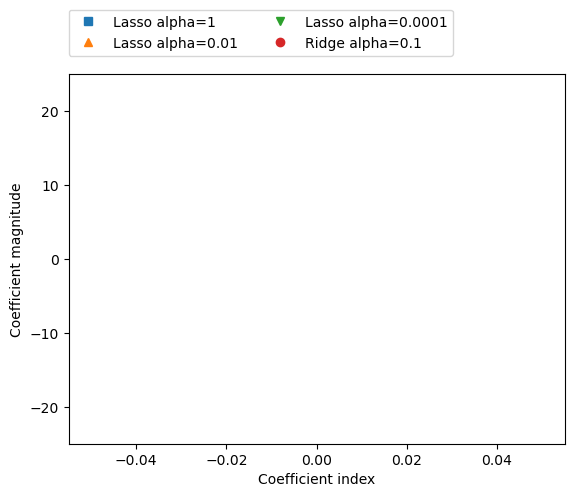

In [27]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
